In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
from scipy.special import factorial

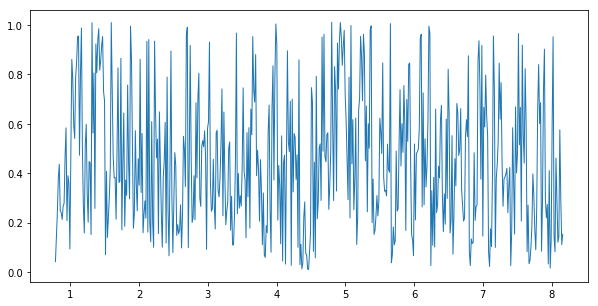

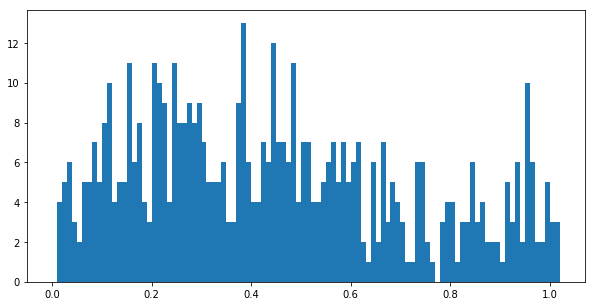

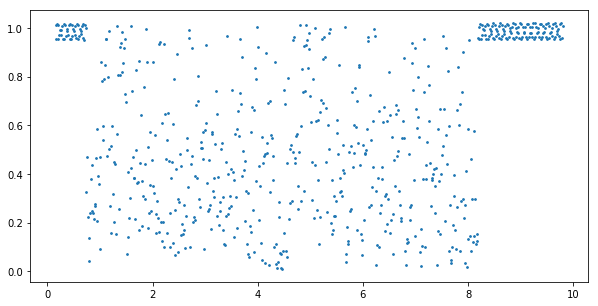

In [5]:
Read="125_alt_Amplitude25mV_offset1V_graisse_etal_1.csv"
data=pd.read_csv(Read,skiprows=44).values
data
Volts=data[3:,3]
Time=data[3:,1]
Amps=data[3:,2]
Volts1 = Volts.astype(np.float)
Time1= Time.astype(np.float)
Amps1= Amps.astype(np.float)
Volts=Volts1[10:700]
Time=Time1[10:700]

for i in np.arange(0,len(Volts),1):
    if Volts[i] < 0.2:
        First=i
        break;
        
for i in np.flip(np.arange(0,len(Volts),1)):
    if Volts[i] < 0.2:
        Last=i
        break;
        
Volts=Volts[First:Last]
Time=Time[First:Last]
plt.figure(figsize=(10,5))
plt.plot(Time,Volts,linewidth=1)

Max=np.max(Volts)
Min=0
Pas=0.01
Balayage=np.arange(Min,Max+Pas,Pas)
Balayage

plt.figure(figsize=(10,5))
plt.hist(Volts,bins=Balayage)

plt.figure(figsize=(10,5))
plt.scatter(Time1[10:700],Volts1[10:700],s=3)

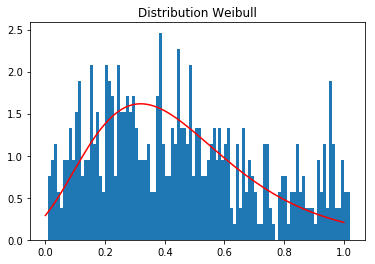

In [6]:
from scipy.stats import  lognorm
from scipy import stats
from numpy import linspace
from pylab import plot,show,hist,figure,title

# picking 150 of from a normal distrubution
# with mean 0 and standard deviation 1
#samp = gamma.rvs(2,size=1000) 
samp1=Volts
param =  lognorm.fit(samp1) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = linspace(0,1,1000)
# fitted distribution
pdf_fitted =  lognorm.pdf(x,param[0],param[1],param[2])


title('Distribution Weibull')
plot(x,pdf_fitted,'r-')
hist(Volts,bins=Balayage,density=True) #density=True #permet de normaliser
show()

In [7]:
def FWHM(X,Y):
    half_max = max(Y) / 2.
    #find when function crosses line half_max (when sign of diff flips)
    #take the 'derivative' of signum(half_max - Y[])
    d = np.sign(half_max - np.array(Y[0:-1])) - np.sign(half_max - np.array(Y[1:]))
    #plot(X[0:len(d)],d) #if you are interested
    #find the left and right most indexes
    left_idx = np.where(d > 0)[0]
    if left_idx.size==0:
        left_idx=0
    right_idx = np.where(d < 0)[-1]
    return X[right_idx] - X[left_idx] #return the difference (full width)

In [9]:
Amplitude=[25, 50, 75, 100, 125, 150, 175, 200]
MAX=np.zeros(len(Amplitude))
Mid=np.zeros(len(Amplitude))
l=0
for k in Amplitude:
    Ind=str(k)
    Read="125_alt_Amplitude"+Ind+"mV_offset1V_graisse_etal_1.csv"
    data=pd.read_csv(Read,skiprows=44).values
    data
    Volts=data[3:,3]
    Time=data[3:,1]
    Amps=data[3:,2]
    Volts1 = Volts.astype(np.float)
    Time1= Time.astype(np.float)
    Amps1= Amps.astype(np.float)
    Volts=Volts1[10:700]
    Time=Time1[10:700]

    for i in np.arange(0,len(Volts),1):
        if Volts[i] < 0.2:
            First=i
            break;

    for i in np.flip(np.arange(0,len(Volts),1)):
        if Volts[i] < 0.2:
            Last=i
            break;

    Volts=Volts[First:Last]
    Time=Time[First:Last]
    Max=np.max(Volts)
    Min=0
    Pas=0.01
    Balayage=np.arange(Min,Max+Pas,Pas)
    Balayage
    
    #FIT
    
    samp1=Volts
    param =  lognorm.fit(samp1)
    x = linspace(0,1,10000)
    pdf_fitted =  lognorm.pdf(x,param[0],param[1],param[2])
    MAX[l]=np.argmax(pdf_fitted)/10000
    Mid[l]=FWHM(x,pdf_fitted)
    l=l+1

In [17]:
MAX

array([0.1049, 0.0788, 0.0832, 0.1147, 0.0799, 0.0263, 0.0527, 0.0934,
       0.0671, 0.0514])

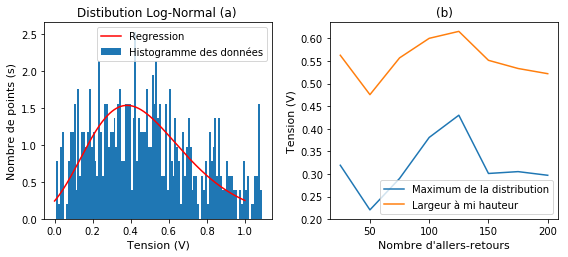

In [10]:
Read="125_alt_Amplitude100mV_offset1V_graisse_etal_1.csv"
data=pd.read_csv(Read,skiprows=44).values
data
Volts=data[3:,3]
Time=data[3:,1]
Amps=data[3:,2]
Volts1 = Volts.astype(np.float)
Time1= Time.astype(np.float)
Amps1= Amps.astype(np.float)
Volts=Volts1[10:700]
Time=Time1[10:700]

for i in np.arange(0,len(Volts),1):
    if Volts[i] < 0.2:
        First=i
        break;
        
for i in np.flip(np.arange(0,len(Volts),1)):
    if Volts[i] < 0.2:
        Last=i
        break;
        
Volts=Volts[First:Last]
Time=Time[First:Last]

Max=np.max(Volts)
Min=0
Pas=0.01
Balayage=np.arange(Min,Max+Pas,Pas)
Balayage

from scipy.stats import  lognorm
from scipy import stats
from numpy import linspace
from pylab import plot,show,hist,figure,title

# picking 150 of from a normal distrubution
# with mean 0 and standard deviation 1
#samp = gamma.rvs(2,size=1000) 
samp1=Volts
param =  lognorm.fit(samp1) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = linspace(0,1,100000)
# fitted distribution
pdf_fitted =  lognorm.pdf(x,param[0],param[1],param[2])#*np.linalg.norm(Volts) pour que ça colle aux données et mettre density=False

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)

plot(x,pdf_fitted,'r-',label="Regression")
hist(Volts,bins=Balayage,density=True,label="Histogramme des données") #density=True #permet de normaliser

plt.xlabel('Tension (V)',fontsize=11)
plt.ylabel('Nombre de points (s)',fontsize=11)
title('Distibution Log-Normal (a) ')
plt.legend()

plt.subplot(1,2,2)
title('(b)')
plt.plot(Amplitude,MAX,label="Maximum de la distribution")
plt.plot(Amplitude,Mid,label="Largeur à mi hauteur")
plt.xlabel("Nombre d'allers-retours",fontsize=11)
plt.ylabel('Tension (V)',fontsize=11)
plt.legend()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('relax_graisse_cc_log.eps')